<a href="https://colab.research.google.com/github/paulo-rego/Sebrae-FAMPE/blob/filtra-xls/Filtro_XLS_FAMPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Passo 1 - Executar o script
Para começar a atualização basta apertar Ctrl+F9 ou clicar em "Ambiente de execução" na barra superior e escolher a opção "Executar tudo". O script indicará todas as etapas que necessitam de alguma intervenção do usuário.  

 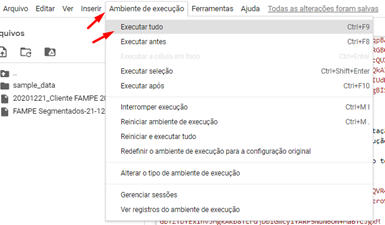
## Passo 2 - Fazer upload da base de clientes
Depois de alguns segundos o programa vai parar sua execução e pedir para que o usuário faça upload do arquivo XLS. Para isso basta clicar em "Escolher arquivos" e escolher o arquivo Excel com o arquivo XLS que deve ser segmentado.  

 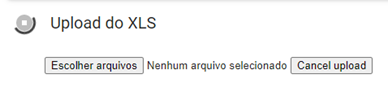
## Passo 3 – Escolher o banco que vai ser filtrado
Após o upload do arquivo ser completado, o script vai pedir que o usuário digite o código do banco que deve ser filtrado. O usuário deve inserir o código do banco desejado (4 dígitos) e pressionar a tecla ENTER para continuar.  

 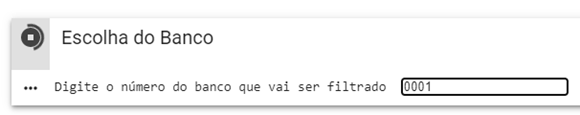

## Passo 4 – Download do arquivo resultante
O programa fará o restante do trabalho sozinho. Após o fim da execução do código o arquivo vai ser salvo no armazenamento da máquina virtual como “Banco {código do banco procurado} -{data de hoje}.xlsx”. Caso você esteja usando o Google Chrome, o arquivo vai ser baixado automaticamente. Caso isso não aconteça ou você esteja usando outro navegador, basta clicar nos 3 pontinhos ao lado do arquivo e selecionar a opção de "Fazer download".  

 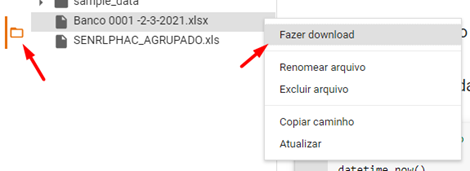


In [1]:
#@title Importação de bibliotecas
import pandas as pd
import numpy as np
import glob
from google.colab import files
import datetime

In [2]:
#@title Upload do XLS

arquivo = files.upload()

Saving SENRLPHAC_AGRUPADO.xls to SENRLPHAC_AGRUPADO.xls


In [3]:
#@title Escolha do Banco
banco = str(input("Digite o número do banco que vai ser filtrado  "))

Digite o número do banco que vai ser filtrado  0001


In [4]:
#@title Leitura do arquivo XLS

arq = glob.glob("*.xls")
xls = pd.ExcelFile(arq[0])
n_planilhas = len(xls.sheet_names)

In [5]:
#@title Tratamento dos dados

#Procura o arquivo no armazenamento
arq = glob.glob("*.xls")
#Salva o caminho para o arquivo
xls = pd.ExcelFile(arq[0])
#Lê quantas planilhas há no arquivo
n_planilhas = len(xls.sheet_names)
#Inicializa o dataframe que vai receber os dados
dados = pd.DataFrame()

#Leitura iterativa da planilha dos planilhas do arquivo
for i in range(n_planilhas):
  if i == 0:
    temp = pd.read_excel(xls,dtype=str,sheet_name=i,header = 1, skiprows = 15, usecols= "F,G,K,L,M,P")
    colunas = temp.columns
  else:
    temp = pd.read_excel(xls,dtype=str,names = colunas, sheet_name=i,header = 0, skiprows = 12, usecols= "F,G,J,K,L,N")
  dados = dados.append(temp)

#Remove a linha de total
dados = dados[:-1]

#Filtra apenas pelo banco desejado
dados = dados[dados.Banco == banco]

In [6]:
#@title Salva o arquivo Excel com o resultado

dia = datetime.datetime.now()

with pd.ExcelWriter(f"Banco {banco} -{dia.day}-{dia.month}-{dia.year}.xlsx",mode = "w") as writer:
  dados.to_excel(writer, sheet_name = f"Banco {banco}", index = False)

files.download(f"Banco {banco} -{dia.day}-{dia.month}-{dia.year}.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>